In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem

In [3]:
import os
if os.path.basename(os.getcwd()) == "1_data":
    os.chdir("..")  

# Path to data
raw_csv_path = "1_data/initial_data/TRPM8-homosapien-compounds-activities-processed.csv"
df = pd.read_csv(raw_csv_path, delimiter=',')
print("Initial data shape:", df.shape)
print("Columns:", df.columns.tolist())

Initial data shape: (654, 25)
Columns: ['Molecule ChEMBL ID', 'Molecular Weight', '#RO5 Violations', 'AlogP', 'Compound Key', 'Smiles', 'Standard Type', 'Standard Value', 'Standard Units', 'pChEMBL Value', 'Data Validity Comment', 'Ligand Efficiency BEI', 'Ligand Efficiency LE', 'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Action Type', 'InChI', 'Potency', 'Molecular Weight_standardized', 'AlogP_standardized', 'Standard Value_standardized', 'pChEMBL Value_standardized', 'Ligand Efficiency LE_standardized', 'Ligand Efficiency LLE_standardized', 'Ligand Efficiency SEI_standardized']



Missing values in required columns:
Molecule ChEMBL ID      0
Smiles                  0
pChEMBL Value         125
dtype: int64


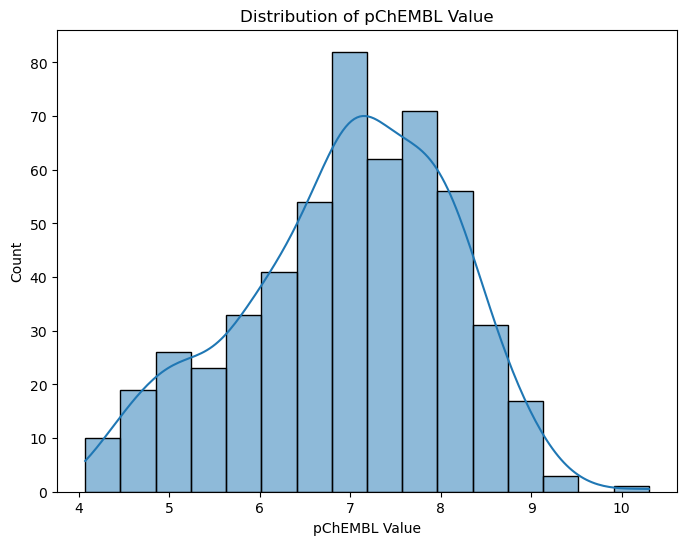


Cleaned data shape: (529, 25)

Value counts for the Potency_Class column:
Potency_Class
2    286
1    208
0     35
Name: count, dtype: int64


,Molecule ChEMBL ID,Smiles,pChEMBL Value,Potency_Class
0,CHEMBL3235962,N#Cc1cccc(NC(=O)N2CCc3ccccc3[C@H]2c2ccc(C(F)(F...,7.08,2
1,CHEMBL3235983,C[C@H](NC(=O)N1CCc2ccccc2[C@H]1c1ccc(C(F)(F)F)...,8.00,2
2,CHEMBL1650511,FC(F)(F)c1ccccc1-c1cc(C(F)(F)F)c2[nH]c(C3=NOC4...,9.38,2
3,CHEMBL2443068,O=C1CC2(CCN(C(=O)Nc3ccc(C(F)(F)F)cc3)CC2)Oc2c(...,6.64,1
4,CHEMBL3959823,Cc1cccc(CN(C(=O)c2ccccc2)[C@@H](C(N)=O)c2ccccc...,6.06,1
...,...,...,...,...
649,CHEMBL207433,O=C(Nc1ccccc1Br)N[C@@H]1CCN(c2ccc(C(F)(F)F)cn2)C1,5.80,1
650,CHEMBL1377190,CCOC(=O)c1sc(-c2ccc(Cl)cc2)nc1O,6.26,1
651,CHEMBL5275535,CCn1nnc(-c2sc(-c3cnccn3)nc2O)n1,5.72,1
652,CHEMBL5269450,CC(C)CC(=O)c1sc(-c2cccc(F)c2)nc1O,6.54,1


In [6]:
required_cols = ['Molecule ChEMBL ID', 'Smiles', 'pChEMBL Value']

# Checking missing values
print("\nMissing values in required columns:")
print(df[required_cols].isnull().sum())

# Distribution of pChEMBL
plt.figure(figsize=(8,6))
sns.histplot(df['pChEMBL Value'], kde=True)
plt.title("Distribution of pChEMBL Value")
plt.show()

#Data Cleaning

#Drop rows missing key fields
df_clean = df.dropna(subset=required_cols)

#Filter pChEMBL values (2 <= pChEMBL <= 12)
df_clean = df_clean[(df_clean['pChEMBL Value'] >= 2) & (df_clean['pChEMBL Value'] <= 12)]

#Remove duplicates
df_clean = df_clean.drop_duplicates()

#Validate SMILES using RDKit
def is_valid_smiles(smiles):
    mol = Chem.MolFromSmiles(smiles)
    return mol is not None

df_clean = df_clean[df_clean['Smiles'].apply(is_valid_smiles)]

print("\nCleaned data shape:", df_clean.shape)

df_clean = df_clean[required_cols]

# Classification Labels for potency: 0, 1 , or 2
def classify_potency(pchembl):
    if pchembl < 5:
        return 0  # Low Potency
    elif pchembl < 7:
        return 1  # Medium Potency
    else:
        return 2  # High Potency

df_clean['Potency_Class'] = df_clean['pChEMBL Value'].apply(classify_potency)

print("\nValue counts for the Potency_Class column:")
print(df_clean['Potency_Class'].value_counts())

df_clean

In [8]:
#Save the cleaned data
processed_csv_path = "1_data/processed/TRPM8_cleaned.csv"
df_clean.to_csv(processed_csv_path, index=False)
print(f"Cleaned dataset saved to: {processed_csv_path}")

Cleaned dataset saved to: 1_data/processed/TRPM8_cleaned.csv
